#  Classification using Adaptive Neuro Fuzzy Inference System and comparison of fuzzy output with other classification methods

Yashad Samant

## OVERVIEW

In this project, comparison has been made between the state-of-art methods like Linear Discriminant Analysis, Linear Logistic Regression, Non-Linear Logistic Regression and Adaptive Neuro Fuzzy Inference System. To evaluate the performance of each method, three data sets from UCI repository were used based on different demographics-
1. Fertility
2. Teaching Assistant
3. Abalone

We also keep in mind the properties of the data set like the number of instances, attributes etc. to check which property favors which methods.  

## INTRODUCTION

Fuzzy logic was developed in 1965 and since has had a lot of advancements which resulted in ANFIS. ANFIS has been used in various applications since its development, notably the high speed train in Japan, Sony mini-computers, image processing, automobile control systems, household machines etc. We have learn many classification algorithms in class and also observed in Assignment 3 that non-linear models tend to perform better for classification than the linear ones and hence, I believe due to non-linear behavior, fuzzy systems will perform better than the linear models if not the best. Thus, my basic objective is to determine how good fuzzy logic is on various data sets when compared to state-of-art methods like **Linear Discriminant Analysis** (LDA), **Linear Logistic Regression** (LR) & **Non-Linear Logistic Regression** (NLR).

To evaluate the performance of each method, three data sets from UCI repository were used based on different demographics-
1. Fertility
2. Teaching Assistant
3. Abalone

#### INTEREST

Fuzzy logic is very simple to implement when compared to other classification algorithms but the point is, is it accurate as others? While going through research papers on fuzzy logic, it's evident that in spite of being an Artificial Intelligence algorithm there's no training involved and the algorithm is just defined by membership functions which is defined on the basis of the data but it's manual and there's no training involved. 
But in this project, I have used a combination of neural networks and fuzzy logic. The procedure is same as fuzzy logic but when we get the output supervised learning is implemented using a feedback through back propagation algorithm. Thus, it generates a defuzzification model which trains on the basis of the target vector. Thus, it has simplicity of fuzzy logic and accuracy of neural networks. This is what interests me.

#### APPROACH
All the four methods were implemented on three data sets. Graphical demonstration of the confusion matrix was given as well to understand the results better.   

In [1]:
#Importing libraries
import numpy as np
import mlutils as ml
import neuralnetworks as nn
import qdalda as ql
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import anfis
import membershipfunction as mfunc
import mfDerivs as mfd
from IPython.display import Image
%matplotlib inline

## METHODS

### LINEAR DISCRIMINANT ANALYSIS

Classification becomes more complicated as the number of classes increases. As the number of classes is equal to number of discriminants.

For classification, Gaussian or normal distribution function is used because we can vary various parameters and d-dimensions are incorporated in the function. The function is given by:
$$
p(x) = \frac{1}{2\pi^{d/2} |\Sigma |^{1/2}}
      e^{-\frac{1}{2} (x-\mu)^T \Sigma^{-1} (x - \mu)}
$$

where mean $\mu$ is a $d$-dimensional column vector and covariance
matrix $\Sigma$ is a $d\times d$ symmetric matrix.

It also helps us to take care of the masking problem discussed in the lecture.

If we define each side of this last inequality as a discriminant function, $\delta_k(x)$ for
Class $k$, then

$$
      \begin{align*}
        \delta_k(x) = -\frac{1}{2} \ln |\Sigma_k| -\frac{1}{2}(x-\mu_k)^T
\Sigma_k^{-1} (x-\mu_k) + \ln P(C=k)
      \end{align*}
$$

and the class of a new sample $x$ is $argmax[k]; \delta_k(x)$.

The boundary between Class 1 and Class 2 is the set of points $x$
for which $\delta_2(x) = \delta_1(x)$. This equation
is quadratic in $x$, meaning that the boundary between Class 1 and 2
is quadratic.  We have just defined **Quadratic Discriminant Analysis,
or QDA**.  


QDA is simple but not robust. QDA is function of covariance matrices of each and every discriminant function. If the data is overfitted or in simple terms if two rows of the matrix give the same information or if the rank of the matrix is less than d, then the matrix is termed as singular i.e. the determinant of the matrix is 0 and hence inverse of the matrix is undefined.

Thus, to take this into consideration we average out all the covariace matrices into one matrix which is common for all discriminant functions. This gives us the defination of the **Linear Discriminant Analysis or LDA**.

Above we showed that if we assume the same covariance matrix, $\Sigma$, for each class, where 
$$
\begin{align*}
\Sigma = \sum_{k=1}^K \frac{N_k}{N} \Sigma_k,
\end{align*}
$$
our discriminant function becomes
$$
      \begin{align*}
        \delta_k(x) = x^T \Sigma^{-1} \mu_k - \frac{1}{2}\mu_k^T \Sigma^{-1} \mu_k + \log
        P(C=k)
      \end{align*}
$$

Linear discriminant analysis (LDA) is a generalization of Fisher's linear discriminant, a method used in statistics, pattern recognition and machine learning to find a linear combination of features that characterizes or separates two or more classes of objects or events. The resulting combination may be used as a linear classifier, or, more commonly, for dimensionality reduction before later classification.

### LDA Python Definition

LDA is implementation is obtained using two functions-:

a) trainLDA - I have used qdalda.py implemented in the class. It consists of QDA and LDA classes. As we are implementing LDA, we only call for ql.LDA(). LDA class includes the implementation of QDA class as well, as the only change between the two classes is the discriminant function. Hence, we define a new discriminant function for LDA.

So when we call for train function, train function from class QDA is called which in turn calls the finishtrain function in LDA, thus returning the model lda.

b) evaluateLDA - model is the output formed by trainLDA, std, mean etc which we use in use function in qdalda. Using model.use(), we obtain predicted classes, probabilities and discriminant. Using the formula for percent error, we calculate error as shown in the fuction and return it.  

In [2]:
def trainLDA(X, T, parameters=None):
    lda = ql.LDA()
    lda.train(X, T)
    return lda

def evaluateLDA(model, X, T):
    c, prob, d = model.use(X)
    error = np.sum(c==T)/X.shape[0] * 100
    return error

### Linear and Non-linear logistic regression

In LDA, we used the normal distribution function to remove the masking problem. But using linear and non-linear logistic regression, we can use linear model that predicts $p(C=k|x)$ and avoid the masking problem. 

To go about this method, our objective is to maximize the data likelihood $$
    \begin{align*}
      L(w) & = \prod_{n=1}^N \prod_{k=1}^K p(C=k\,|\, x_n) ^ {t_{n,k}}
    \end{align*}
$$
by taking the derivative or the gradient of w and use logarithms to simplify the calculations.

$$
    \begin{align*}
      LL(w) = \log L(w) = \sum_{n=1}^N \sum_{k=1}^K t_{n,k}  \log p(C=k\,|\,x_n)
    \end{align*}
$$

In our regressions algorithms, we were supposed to reduce the error by reducing the weights using gradient descent but to maximize weight we have to use gradient ascent.

$$
    \begin{align*}
        w_j  \leftarrow w_j + \alpha \sum_{n=1}^N
        (t_{n,j} - g_j(x_n)) x_n
        \end{align*}
$$

### Neural Network Logistic Regression Python Definitions

a) trainNN - Again, this is similar to LDA. Here, instead of class LDA, class NeuralNetworkClassifier is called where all the parameters are initialized. Then, we use train function within the the class to obtain the values for the model. Eg - weights, std etc. We return this model and call it in evaluateNN.

b) evaluateNN - Here, it's exactly same as LDA. But instead of three values as in LDA, we obtain just the predicted output Y. We compare it with Target T and calculate the percent error.

In neural network, we have two methods, linear and non-linear logistic regression. But the only difference between the two is the number of hidden layers in between the input and output layers. If h = 0, then it's linear logistic regression otherwise non-linear.

In [3]:
def trainNN(X, T, parameters):
    classes = len(np.unique(T))
    nnet = nn.NeuralNetworkClassifier(X.shape[1], parameters[0], classes)
    nnet.train(X, T, nIterations=parameters[1], verbose=False)
    return nnet

def evaluateNN(model, X, T):
    Y = model.use(X)
    error = np.sum(Y==T)/X.shape[0] * 100
    return error

### BACKGROUND OF FUZZY LOGIC

Fuzzy logic is a form of many-valued logic in which the truth values of variables may be any real number between 0 and 1. By contrast, in Boolean logic, the truth values of variables may only be the integer values 0 or 1. Fuzzy logic has been employed to handle the concept of partial truth, where the truth value may range between completely true and completely false. Furthermore, when linguistic variables are used, these degrees may be managed by specific (membership) functions.

Since the fuzzy system output is a consensus of all of the inputs and all of the rules, fuzzy logic systems can be well behaved when input values are not available or are not trustworthy. Weightings can be optionally added to each rule in the rulebase and weightings can be used to regulate the degree to which a rule affects the output values. These rule weightings can be based upon the priority, reliability or consistency of each rule. These rule weightings may be static or can be changed dynamically, even based upon the output from other rules.

https://en.wikipedia.org/wiki/File:Fuzzy_logic_temperature_en.svg


Fuzzify all input values into fuzzy membership functions.
Execute all applicable rules in the rulebase to compute the fuzzy output functions.
De-fuzzify the fuzzy output functions to get "crisp" output values.



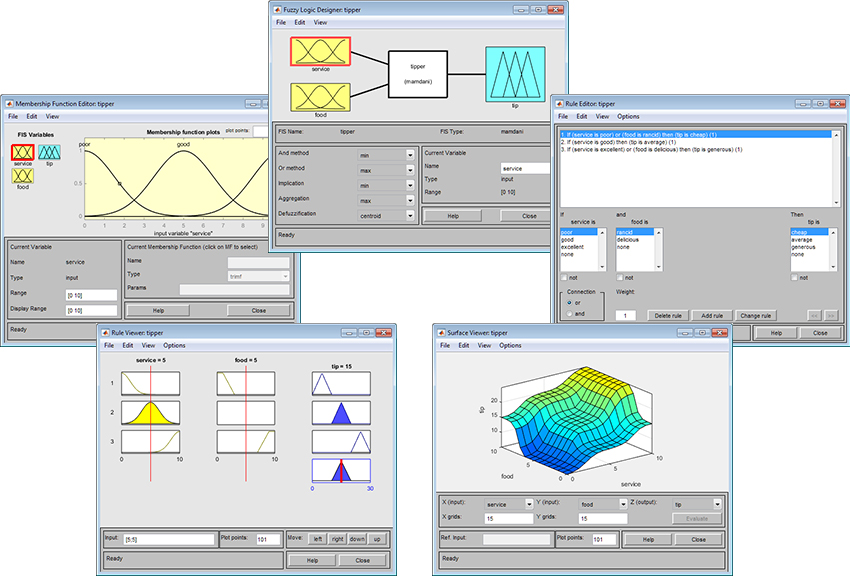

In [4]:
Image("C:/Users/Yashad/Desktop/Books/machine learning/1469941085480.jpg")

### ANFIS

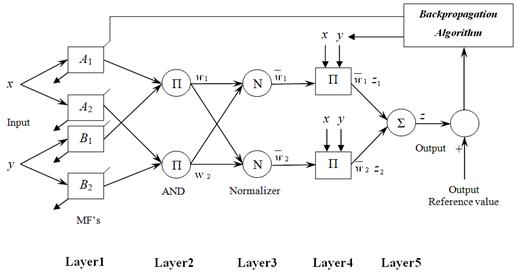

In [5]:
Image("C:/Users/Yashad/Desktop/Books/machine learning/image010.jpg")

We assume the fuzzy inference system under consideration has two inputs x and y and one output z. Suppose that the rule base contains two fuzzy if-then rules of Takagi and Sugeno’s type.
Rule 1: If x is A1 and y is B1, then fi = plx + q1y+ rl,
Rule 2: If x is A2 and y is B2, then f 2 = p2x + q2y+ 7-2.
The node functions in the same layer are of the same function family as described below:
 
Layer 1: Every node i in this layer is a square node with a node function
 $$O^1_i = \mu_A(x)$$
 
Layer 2: Every node in this layer is a circle node labeled Tz which multiplies the incoming signals and sends the product out. For instance,
 $$w_i = \mu_A(x)*\mu_B(y), i = 1,2$$
 
Layer 3: Every node in this layer is a circle node labeled N. The ith node calculates the ratio of the ith rule’s firing strength to the sum of all rules’ firing strengths:
 $$w_m = \frac{w_i}{w_1+w_2}, i=1,2 $$
 
Layer 4: Every node i in this layer is a square node with a node function

$$O^4_i = w_mf_i = w_i(p_ix+q_iy+r_i)$$ 

Layer 5:The single node in this layer is a circle node labeled C that computes the overall output as the summation of all incoming signals, i.e.,

$$O^5_i = \sum_iw_mf_i = \frac{\sum_iw_if_i}{\sum_iw_i}$$

Thus, here we have a general model of **ANFIS**. I have used Mamdani method to design the membership function of the anfis system. It gives a non-linear approximation of all the input variables. We need not zero mean the input seaparately as the fuzzification process involves standardization which. Then, values obtained from different inputs are processed using the centroid method. But we have seen in the fuzzy logic section that there is no training involved and just calculation of final values based on the input. But in case of anfis we have target values, using backpropagation and/or least mean square error, we change the weights thus training the neural net as we can see in the above model. 

Thus, it is a combination of fuzzy logic using which output is obtained and neural net where the net is trained using the target values.

 

In [2]:
def printResults(label,results):
    print('{:4s} {:>20s}{:>8s}{:>8s}{:>8s}'.format('Algo','Parameters','TrnAcc','ValAcc','TesAcc'))
    print('-------------------------------------------------')
    for row in results:
        # 20 is expected maximum number of characters in printed parameter value list
        print('{:>4s} {:>20s} {:7.2f} {:7.2f} {:7.2f}'.format(label,str(row[0]),*row[1:]))

### DATA SET I - Fertility

Fertility data set is obtained from the UCI repository. The link to the data set is -: https://archive.ics.uci.edu/ml/datasets/Fertility

The data set is developed by World Health Organization (WHO) who have taken a sample of semen of 100 people having different attributes (10) as mentioned below. They have checked the effect of each attribute on the fertility of the human being. 

This data set was chosen as it is small and easy to understand having real values making it easier to implement using any machine learning model. Moreover, the data is clean and there is hardly any preprocessing that needs to be done. As the data is from a reputed organization, I felt that the attributes will definitely have relation with the output. 

The reason to chose a small data set was to observe the performance of anfis on small number of instances and evaluate results as Logistic Regression works very well with small set.

Detailed information on fertility set is as follows-:

1. Number of Instances: 100

2. Number of Attributes: 10 (including the class attribute)

3. Attribute Information:
    
    1. Season in which the analysis was performed. 1) winter, 2) spring, 3) Summer, 4) fall. (-1, -0.33, 0.33, 1) 

    2. Age at the time of analysis. 18-36 (0, 1) 

    3. Childish diseases (ie , chicken pox, measles, mumps, polio) 1) yes, 2) no. (0, 1) 

    4. Accident or serious trauma 1) yes, 2) no. (0, 1) 

    5. Surgical intervention 1) yes, 2) no. (0, 1) 

    6. High fevers in the last year 1) less than three months ago, 2) more than three months ago, 3) no. (-1, 0, 1) 

    7. Frequency of alcohol consumption 1) several times a day, 2) every day, 3) several times a week, 4) once a week, 
      5) hardly ever or never (0, 1) 

    8. Smoking habit 1) never, 2) occasional 3) daily. (-1, 0, 1) 

    9. Number of hours spent sitting per day ene-16 (0, 1) 

    10. Output: Diagnosis normal (N), altered (O) 

In this data, diagnosis was used as target vector. For ANFIS, only first four rows were used to avoid memory error. 

X shape: (100, 9)
T shape: (100, 1)


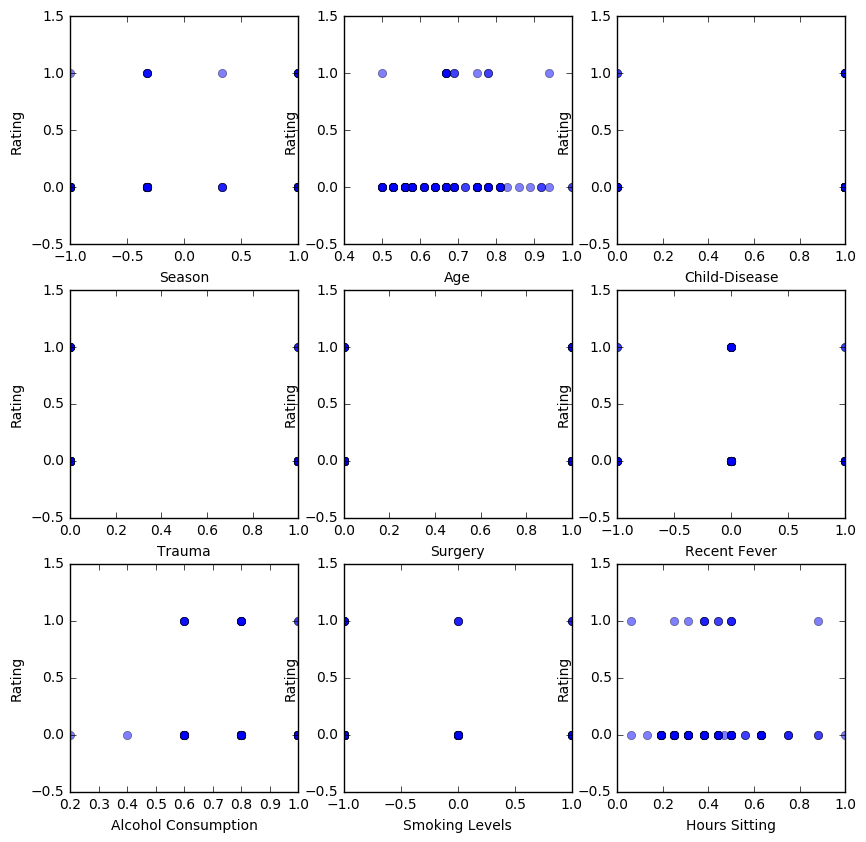

In [7]:
fert_convert = lambda x: 0 if b'N' in x else 1
data = np.loadtxt('fertility.txt', delimiter=',', converters={9: fert_convert})

X = data[:,:-1]
T = data[:,-1].reshape( (X.shape[0], 1))

print("X shape: {}".format(X.shape))
print("T shape: {}".format(T.shape))

names = [ 'Season', 'Age', 'Child-Disease', 'Trauma', 'Surgery', 'Recent Fever', 
        'Alcohol Consumption', 'Smoking Levels', 'Hours Sitting', 'Diagnosis']


## Visualize fert
plt.figure(figsize=(10,10))
first_plot_set = range(9)
second_plot_set = range(9,X.shape[1])
for c in first_plot_set:
    plt.subplot(3,3, c+1)
    plt.ylim(-0.5, 1.5)
    plt.plot(X[:,c], T, 'o', alpha=0.5)
    plt.ylabel("Rating")
    plt.xlabel(names[c])
    

In [8]:
# LDA
results_lda = ml.trainValidateTestKFoldsClassification(trainLDA, evaluateLDA, X, T, [None], nFolds=5, shuffle=False,verbose=False)
printResults('LDA:', results_lda)


Algo           Parameters  TrnAcc  ValAcc  TesAcc
-------------------------------------------------
LDA:                 None   72.92   66.21   48.28
LDA:                 None   68.37   58.88   66.67
LDA:                 None   67.00   59.00   80.00
LDA:                 None   67.65   63.26   65.22
LDA:                 None   75.00   67.90   57.14


C:\Users\Yashad\Desktop\Books\machine learning\qdalda.py:103: RuntimeWarning: invalid value encountered in log
  - 0.5*np.sum(np.dot(Xs,self.sigmaMeanInv) * Xs, axis=1).reshape((-1,1)))


In [9]:
# Linear Logistic Regression
results_lr = ml.trainValidateTestKFoldsClassification(trainNN, evaluateNN, X, T, [ [[0], 15], [[0], 300], [[0], 425], [[0], 500], [[0], 600]], nFolds=5, shuffle=False,verbose=False)
printResults('LR:', results_lr)


Algo           Parameters  TrnAcc  ValAcc  TesAcc
-------------------------------------------------
 LR:            [[0], 15]   80.21   70.88   51.72
 LR:            [[0], 15]   76.53   65.80   70.37
 LR:            [[0], 15]   71.00   63.49   76.00
 LR:            [[0], 15]   72.55   65.06   73.91
 LR:            [[0], 15]   74.04   69.85   66.67


In [10]:
# Non-linear logistic regression
results_nlr = ml.trainValidateTestKFoldsClassification(trainNN, evaluateNN, X, T, [ [[3], 575], [[4], 400], [[5], 325], [[6], 200], [[7], 100] ], nFolds=5, shuffle=False,verbose=False)
printResults('NLR:', results_nlr)


Algo           Parameters  TrnAcc  ValAcc  TesAcc
-------------------------------------------------
NLR:           [[5], 325]   98.96   86.91   79.31
NLR:           [[7], 100]   98.98   83.79   96.30
NLR:           [[5], 325]   99.00   82.46   84.00
NLR:           [[3], 575]   99.02   85.36   65.22
NLR:           [[7], 100]   99.04   85.90   85.71


       0    1
    ------------
 0 | 72.7 27.3   (88 / 88)
 1 | 33.3 66.7   (12 / 12)


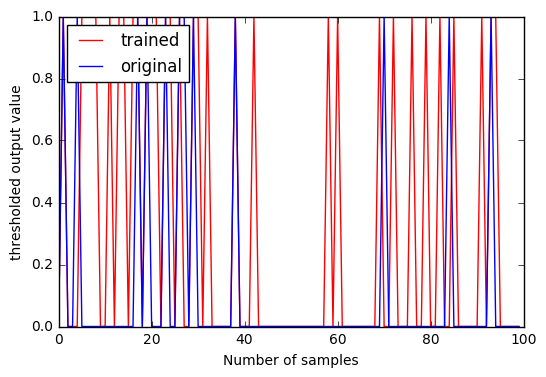

In [11]:
# Confusion matrix
lda = ql.LDA()
lda.train(X,T)
predictedClasses,_,_ = lda.use(X)
ml.confusionMatrix(T,predictedClasses,np.unique(T)); # <- semi-colon prevents printing of returned result
ml.plotResults(T,predictedClasses)

added error:  3.74384830995
average error:  0.0903015018776
added error:  3.75195503154
average error:  0.0904532366643
added error:  3.75917918436
average error:  0.0905812362506
added error:  3.76465272519
average error:  0.0906747849165
added error:  3.76772013538
average error:  0.0907260661192
added error:  3.76784298468
average error:  0.0907289154675
added error:  3.76452436858
average error:  0.0906778802616
added error:  3.75723323553
average error:  0.0905672802274
added error:  3.74531475783
average error:  0.0903900860537
added error:  3.7261168637
average error:  0.0901116058853
added error:  3.6959929064
average error:  0.0896906892865
added error:  3.65122654475
average error:  0.0891385926776
added error:  3.62745578532
average error:  0.0898095280372
added error:  3.79661278646
average error:  0.0940074085515
-0.0
-0.0
0.200846


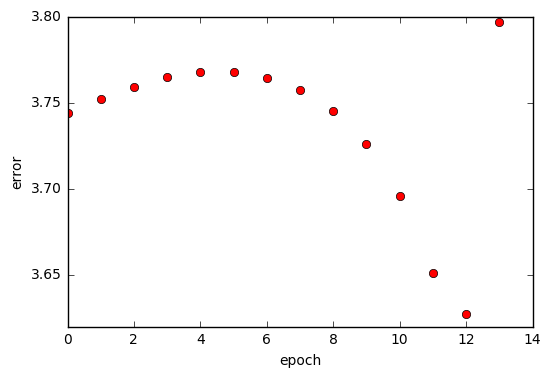

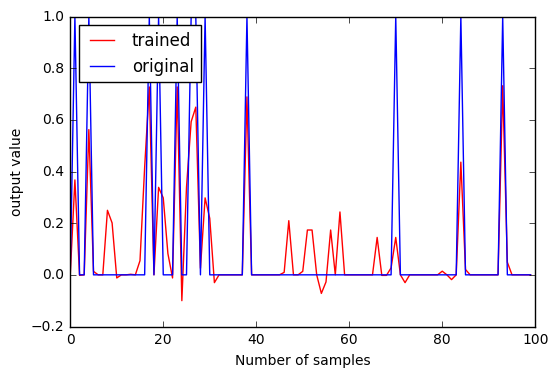

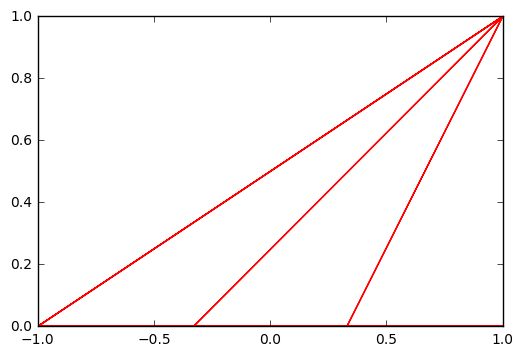

In [12]:
#ANFIS
X = data[:,0:5]
T = data[:,-1].reshape( (X.shape[0], ))
mf = [[['gaussmf',{'mean':-0.33,'sigma':0.1}],['gaussmf',{'mean':0.33,'sigma':0.1}],['gaussmf',{'mean':-1,'sigma':0.1}],['gaussmf',{'mean':1,'sigma':0.1}]],
     [['gaussmf',{'mean':0.55,'sigma':0.075}],['gaussmf',{'mean':0.65,'sigma':0.075}],['gaussmf',{'mean':0.75,'sigma':0.075}],['gaussmf',{'mean':0.9,'sigma':0.105}]],
     [['gaussmf',{'mean':0.0,'sigma':0.1}],['gaussmf',{'mean':1.0,'sigma':0.1}]],
     [['gaussmf',{'mean':0.0,'sigma':0.1}],['gaussmf',{'mean':1.0,'sigma':0.1}]],
     [['gaussmf',{'mean':0.0,'sigma':0.1}],['gaussmf',{'mean':1.0,'sigma':0.1}]]]
mfc = mfunc.MemFuncs(mf)
anf = anfis.ANFIS(X, T, mfc)
anf.trainHybridJangOffLine(epochs=15)
print (round(anf.consequents[-1][0],6))
print (round(anf.consequents[-2][0],6))
print (round(anf.fittedValues[9][0],6))

anf.plotErrors()
anf.plotResults() 

anf.plotMF(X[:,0],len(mf)-1)  

       0    1
    ------------
 0 | 97.7  2.3   (88 / 88)
 1 | 16.7 83.3   (12 / 12)


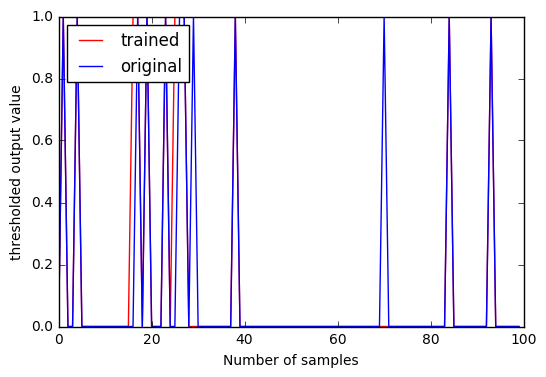

In [13]:
for i in range(len(anf.fittedValues)):
    if(anf.fittedValues[i]<0.3):
        anf.fittedValues[i] = 0
    else:
        anf.fittedValues[i] = 1
ml.confusionMatrix(T,anf.fittedValues,np.unique(T)) 
ml.plotResults(T,anf.fittedValues)

### OBSERVATION FOR DATA I - FERTILITY

### Classification table & Confusion Matrix

1. **LDA** - We divided the fertility data set into three parts - train,test and validate. We have initialized nFolds = 5. Thus, LDA running on five different combinations of test, train and validate data set with random shuffling. We observe that on training data set we get max accuracy of 75%, while it gives 80% on test data set. Validate set achieves very less accuracy with highest being 67.9%. It was also observed that when we delete any column the accuracy tends to drop. It's obvious as more the attributes, higher will be the accuracy. LDA is not flexible as it doesn't have any parameters to vary. While we observe the confusion matrix we see that it gives decent accuracy for classifying 73% class 0 as 0s and class 1s are detected correctly 66% of times which is decent but nothing compared to whooping 97% of anfis.   

2. **Linear Logistic Regression** - As described above, Linear Logistic Regression doesn't consist of hidden layers, but we can vary the number of iterations for which the code will be repeated. Thus, here test was done with 5 different models with 15,300,425,500,600 iterations. But we found that in each fold the model with 15 iterations was better, thus increasing the number of iterations was not useful. We can't say in this case that LLR worked better than LDA. Highest accuracy was for training, 80%. It didn't perform well with either validate or test data sets giving 70 and 76% accuracy respectively. Thus, it wasn't an upgrade on LDA but it took more time to process as compared to LDA. 

3. **Non - Linear Logistic Regression** - It is the best classification method as we can observe from the results. The only change we have here is the inclusion of hidden layers which were not present in LLR. From assignment 4, we concluded that non-linear model works best for classification and in this case as well it worked much better as compared to LDA and LLR. So much so that we achieve training accuracy of 100%, while getting test accuracy to be 96% which is very good as compared to 80% and 76% from LDA and LLr respectively. It takes huge amount to train as compared to other two methods as it consists of hidden layers and iterations as well. On training data, NLR had accuracies over 95% in every fold, also boasting a 100% with one with the highest number of hidden layers. Validate set worked better here as compared to previous two, where all accuracies were over 80. Test data on the other hand gave a 68% accuracy in one of the data set which was unexpected. We also observe that accuracies are functions of both iterations and hidden layers and we can't really justify any relation between the output as it seems random. 

4. **ANFIS** - Then, we have the neuro fuzzy method. It is also a non-linear method and as expected, accuracy is exceptional. There was no validate data set here, just 80% training data and 20% testing data. It gives an approximate model of the original data set and then trains it on the test data set. As seen from the graphs we see that the trained value follows the original and makes an approximate model. If we compare the confusion matrix, we see that class 0 is detected as 0 97.7% of the times which is excellent.We see 83.3% correct decisions for class 1 as well which is far better than the confusion matrix formed by other method which gives 72 and 66 percent accuracy for class 0 and class 1 respectively. Moreover, ANFIS is flexible, we can change epochs, gamma (learning rate). We have to chose gamma carefully as a larger gamma is not good when we use anfis for classification. When gamma = 2, thresholding didn't work at all and confusion matrix gave 60% false positives. As we increase the number of epochs, the accuracy of the model increases. When epoch = 25, summed error reduces 2.34 and average error to 0.08. As it is a approximation model, thresholding has been used to classify and build the confusion matrix. But thresholding can have human error and it being approximation model, we don't see any swift changes in the trained model. For example, on this data set, when there are consecutive 1s and we get a 0, the value it may give will 1.6 but thresholding was done at 1.55 and it will still detect it as a 1. This leads to an error.   

### PLOT Explaination

Fig 1. As observed in the first plot, it gives us a representation of the confusion matrix and we can see how many negatives it gives i.e. the trained model doesn't follow Y properly. Hence, there is wrong classification.

Fig 2. Second plot is anfis error plot. We see that over the epochs the error decreases but suddenly during the last plot it increases. It happened in few other cases too, when I changed gamma but the reason is not evident as it is not because of any parameters. It may be because of the overfitting of the model or a sudden 1 after a consecutive 0 or vice-versa.

Fig 3. It is the approximate model generated by anfis. We can see how it follows the Y. We can see some small spikes at 0 location but after thresholding, they doesn't matter. 

Fig 4. It gives the membership function representation of the fuzzified output. But the matlab representation given with the input is a better representation of this model.

Fig 5. This is the confusion matrix representation of the ANFIS. We see that trained and original almost overlap as the accuracy is so high.

### DATA SET II - TEACHING ASSISTANT

Teaching Assistant data set is obtained from the UCI repository. The link to the data set is -: https://archive.ics.uci.edu/ml/datasets/Teaching+Assistant+Evaluation

The data consist of evaluations of teaching performance over three regular semesters and two summer semesters of 151 teaching assistant (TA) assignments at the Statistics Department of the University of Wisconsin-Madison. The scores were divided into 3 roughly equal-sized categories ("low", "medium", and "high") to form the class variable.

The reason to chose this data-set is that it is small having good attributes and understandable. Moreover, it has real values which adds to the convenience. In this data set, test is on the basis of categories each attribute has. As we can see, that few attributes has approximately 25 categories.

Detailed information of the set is as follows -:
1. Number of Instances: 151

2. Number of Attributes: 6 (including the class attribute)

3. Attribute Information:
  
   1. Whether of not the TA is a native English speaker (binary)
      1=English speaker, 2=non-English speaker
      
   2. Course instructor (categorical, 25 categories)
   
   3. Course (categorical, 26 categories)
   
   4. Summer or regular semester (binary) 1=Summer, 2=Regular
   
   5. Class size (numerical)
   
   6. Class attribute (categorical) 1=Low, 2=Medium, 3=High

I have skipped the class attribute while implementing ANFIS model, as it was either taking five hours to train or memory error popped out.

X shape: (151, 5)
T shape: (151, 1)


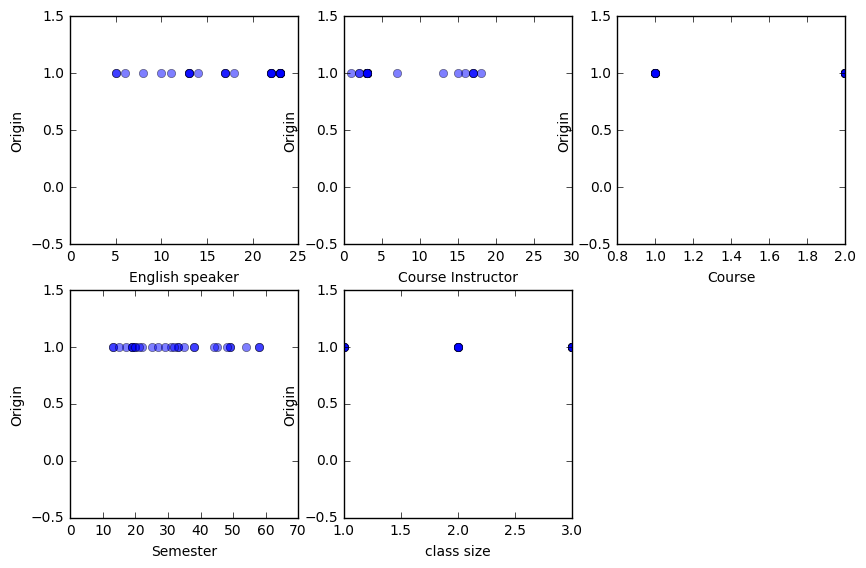

In [4]:
data = np.loadtxt('tae.txt', delimiter=',')
    
X = data[:,1:]
#np.delete(X,0,1)
T = data[:,0].reshape( (X.shape[0], 1) )
    
print("X shape: {}".format(X.shape))
print("T shape: {}".format(T.shape))

names = [ 'English speaker', 'Course Instructor', 'Course', 'Semester', 'class size', 'class']

## Visualize tae
plt.figure(figsize=(10,10))
first_plot_set = range(5)
second_plot_set = range(5,X.shape[1])
for c in first_plot_set:
    plt.subplot(3,3, c+1)
    plt.ylim(-0.5, 1.5)
    plt.plot(X[:,c], T, 'o', alpha=0.5)
    plt.ylabel("Origin")
    plt.xlabel(names[c])

In [15]:
# LDA
results_lda = ml.trainValidateTestKFoldsClassification(trainLDA, evaluateLDA, X, T, [None], nFolds=5, shuffle=False,verbose=False)
printResults('LDA:', results_lda)


Algo           Parameters  TrnAcc  ValAcc  TesAcc
-------------------------------------------------
LDA:                 None   78.73   75.55   73.23
LDA:                 None   77.05   75.41   78.64
LDA:                 None   75.00   71.85   81.01
LDA:                 None   82.94   83.32   78.18
LDA:                 None   81.32   80.21   74.19


In [16]:
# Linear Logistic Regression
results_lr = ml.trainValidateTestKFoldsClassification(trainNN, evaluateNN, X, T, [ [[0], 15], [[0], 300], [[0], 425], [[0], 500], [[0], 600]], nFolds=5, shuffle=False,verbose=False)
printResults('LR:', results_lr)


Algo           Parameters  TrnAcc  ValAcc  TesAcc
-------------------------------------------------
 LR:            [[0], 15]   92.91   90.44   96.85
 LR:            [[0], 15]   93.49   90.93   95.15
 LR:            [[0], 15]   93.99   91.69   93.67
 LR:            [[0], 15]   94.41   91.99   90.91
 LR:            [[0], 15]   94.78   94.14   83.87


In [17]:
# Non-linear logistic regression
results_nlr = ml.trainValidateTestKFoldsClassification(trainNN, evaluateNN, X, T, [ [[3], 575], [[4], 400], [[5], 325], [[6], 200], [[7], 100] ], nFolds=5, shuffle=False,verbose=False)
printResults('NLR:', results_nlr)


Algo           Parameters  TrnAcc  ValAcc  TesAcc
-------------------------------------------------
NLR:           [[6], 200]   97.01   91.78   96.85
NLR:           [[3], 575]   95.55   91.56   97.09
NLR:           [[5], 325]   98.42   93.45   97.47
NLR:           [[6], 200]   98.53   94.34   90.91
NLR:           [[6], 200]   98.08   96.54   83.87


       1    2
    ------------
 1 | 55.2 44.8   (29 / 29)
 2 | 24.6 75.4   (122 / 122)


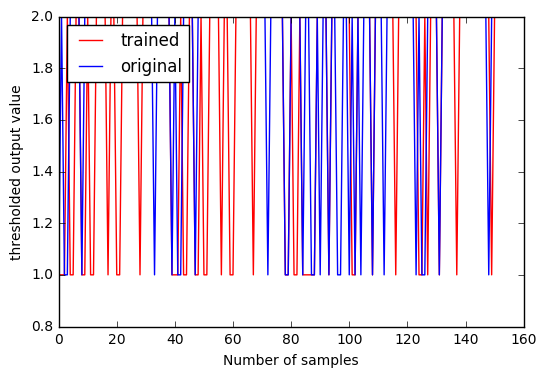

In [5]:
# Confusion matrix
lda = ql.LDA()
lda.train(X,T)
predictedClasses,_,_ = lda.use(X)
ml.confusionMatrix(T,predictedClasses,np.unique(T));
ml.plotResults(T,predictedClasses)

In [ ]:
#ANFIS
X = data[:,1:-1]
T = data[:,0].reshape( (X.shape[0], ))
mf = [[['gaussmf',{'mean':5.0,'sigma':4.0}],['gaussmf',{'mean':10.0,'sigma':3.0}],['gaussmf',{'mean':15.0,'sigma':3.0}],['gaussmf',{'mean':20.0,'sigma':3.0}],['gaussmf',{'mean':25.0,'sigma':3.0}],['gaussmf',{'mean':30.0,'sigma':3.0}]],
     [['gaussmf',{'mean':3.0,'sigma':3.0}],['gaussmf',{'mean':8.0,'sigma':3.0}],['gaussmf',{'mean':15.0,'sigma':7.0}],['gaussmf',{'mean':24.0,'sigma':5.0}]],
     [['gaussmf',{'mean':1.0,'sigma':0.5}],['gaussmf',{'mean':2.0,'sigma':0.5}]],
     [['gaussmf',{'mean':11.0,'sigma':7.0}],['gaussmf',{'mean':23.0,'sigma':7.0}],['gaussmf',{'mean':35.0,'sigma':7.0}],['gaussmf',{'mean':47.0,'sigma':7.0}],['gaussmf',{'mean':59.0,'sigma':7.0}],['gaussmf',{'mean':71.0,'sigma':7.0}]]]

mfc = mfunc.MemFuncs(mf)
anf = anfis.ANFIS(X, T, mfc)
anf.trainHybridJangOffLine(epochs=15)

anf.plotErrors()
anf.plotResults() 
anf.plotMF(X[:,0],len(mf)-1)  

       1    2
    ------------
 1 | 86.2 13.8   (29 / 29)
 2 |  0  100.0   (122 / 122)


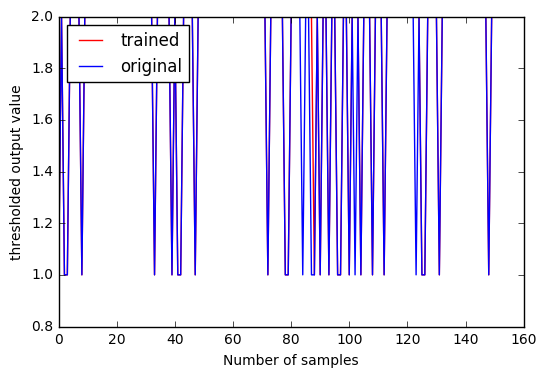

In [20]:
for i in range(len(anf.fittedValues)):
    if(anf.fittedValues[i]<1.55):
        anf.fittedValues[i] = 1
    else:
        anf.fittedValues[i] = 2
ml.confusionMatrix(T,anf.fittedValues,np.unique(T)) 
ml.plotResults(T,anf.fittedValues)

### OBSERVATION FOR DATA II

### Classification Table & Confusion Matrix

1. **LDA** - When compared to the previous data set LDA worked well here. It achieved max test accuracy of 81% with other fold accuracies being more than 70%. We also see it faring well with validate data set where we achieved 50% accuracies in previous data set, it gave 83% accuracy in this data set. Training data was good as well with accuracies over 80%. In spite of achieving higher accuracies than fertility data set, confusion matrix was more or less the same. It achieved 73% correct results for class 2 and 50% for class 1.   

2. **Linear Logistic Regression** - It is a model where there are no hidden layers. We could observe that accuracies obtained with this data set were exceptional. Training data achieved over 90% accuracy with highest being 94.7% while validate worked well as well with 94% accuracy. Test data was good too. Highest accuracy was 96% with the lowest in 80s. Thus, the algorithm was credible for this data set. Again we observed that iterations made no difference on the model with we getting best output with lowest number of iterations defined.

3. **Non - Linear Logistic Regression** - As discussed earlier, it is the best classification method. From assignment 4, we concluded that non-linear model works best for classification and in this case as well, it worked much better as compared to LDA and LLR. We have achieved good overall accuracies with 99% being highest in both training and test data sets for various folds. Moreover, in training data we didn't get accuracy lower than 98% for any fold while for test lowest was 83% which is decent. Validate worked well as well with all accuracies being over 93%. In this case, we saw similar performance between LLR and NLR, thus, if we want to trade off between time and 1% accuracy we can chose LLR.

4. **ANFIS** - ANFIS worked far better than the other methods as suggested by its confusion matrix. It was able to recognize all class 2 as 2s giving 100% accuracy while it classified few 1s as 2s as well giving 83% accuracy. That's the problem with anfis, as it is an approximation model, when there are lot of 2s and less 1s it fits the model with threshold towards 2. Thus, while thresholding to design a classification problem we get an error. It is susceptible to sudden changes.  

### PLOT Explaination

Fig 1 - It is the confusion matrix representation in graphical form. We see that many classes are not trained properly as compared to ANFIS.

Fig 2 - It is the change in error with increase in epochs. We do not see any abrupt increase of error as we have seen previously. We see that error decreases over epochs.

Fig 3 - It is an approximate model generated by anfis. We can see that trained output almost follows the target leading to highly accurate model. 

Fig 4 - It is the representation of fuzzified membership function.

Fig 5 - It is the confusion matrix representation of ANFIS. We see that original and trained output almost overlap each other.

### DATA SET III - ABALONE

As my objective is to compare the performance of various methods, I will be trying on various data-sets but will start with Abalone data in the UCI repository. While selecting data, I took into consideration number of instances.
Link to the data-set: https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/

**Data-set Information**

 Number of Instances: 4177


 Number of Attributes: 8


 Attribute information:

   Given is the attribute name, attribute type, the measurement unit and a
   brief description.  The number of rings is the value to predict: either
   as a continuous value or as a classification problem.

    Name		Data Type	Meas.	Description
    
	----		---------	-----	-----------
    
    Sex		    nominal			M, F, and I (infant) 
    
	Length		continuous	(mm)	Longest shell measurement
    
	Diameter	continuous	(mm)	perpendicular to length
    
	Height		continuous	(mm)	with meat in shell
    
	Whole weight	continuous	(grams)	whole abalone
    
	Shucked weight	continuous	(grams)	weight of meat
    
	Viscera weight	continuous	(grams)	gut weight (after bleeding)
    
	Shell weight	continuous	(grams)	after being dried
    
	Rings		integer			+1.5 gives the age in years

   Statistics for numeric domains:

		Length	Diam	Height	Whole	Shucked	Viscera	Shell	Rings
	Min	0.075	0.055	0.000	0.002	0.001	0.001	0.002	    1
	Max	0.815	0.650	1.130	2.826	1.488	0.760	1.005	   29
	Mean	0.524	0.408	0.140	0.829	0.359	0.181	0.239	9.934
	SD	0.120	0.099	0.042	0.490	0.222	0.110	0.139	3.224
	Correl	0.557	0.575	0.557	0.540	0.421	0.504	0.628	  1.0

 Missing Attribute Values: None


 Class Distribution:

	Class	Examples
	-----	--------
	1	1
	2	1
	3	15
	4	57
	5	115
	6	259
	7	391
	8	568
	9	689
	10	634
	11	487
	12	267
	13	203
	14	126
	15	103
	16	67
	17	58
	18	42
	19	32
	20	26
	21	14
	22	6
	23	9
	24	2
	25	1
	26	1
	27	2
	29	1
	-----	----
	Total	4177
    
I could only implement it on 2 columns of the data set because as it I incresed the columns it used to give memory error for anfis.     
    
    

X shape: (4177, 2)
T shape: (4177, 1)


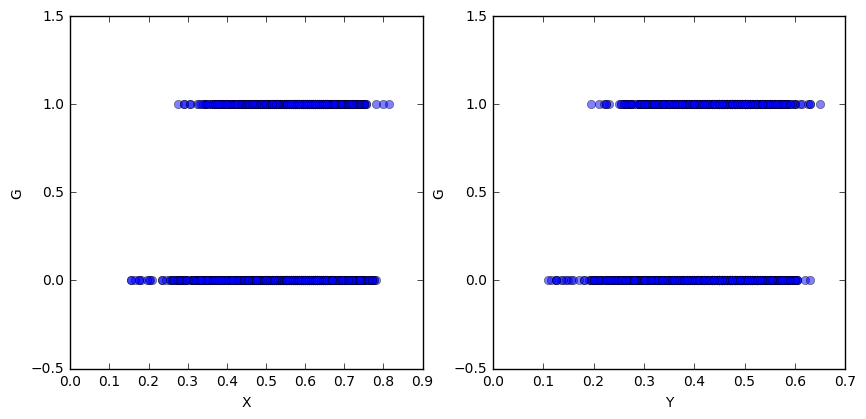

In [8]:
abalone_convert = lambda x: 0 if b'M' in x else 1 if b'F' in x else 2  
data = np.loadtxt('abalone.txt', delimiter=',', converters={0: abalone_convert})

X = data[:,1:3]
T = data[:,0].reshape( (X.shape[0], 1))

print("X shape: {}".format(X.shape))
print("T shape: {}".format(T.shape))

names = ['X','Y']

## Visualize abalone
plt.figure(figsize=(10,10))
first_plot_set = range(2)
second_plot_set = range(5,X.shape[1])
for c in first_plot_set:
    plt.subplot(2,2, c+1)
    plt.ylim(-0.5, 1.5)
    plt.plot(X[:,c], T, 'o', alpha=0.5)
    plt.ylabel("G")
    plt.xlabel(names[c])

In [9]:
# LDA
results_lda = ml.trainValidateTestKFoldsClassification(trainLDA, evaluateLDA, X, T, [None], nFolds=5, shuffle=False,verbose=False)
printResults('LDA:', results_lda)


Algo           Parameters  TrnAcc  ValAcc  TesAcc
-------------------------------------------------
LDA:                 None   58.04   56.69   62.74
LDA:                 None   56.80   55.63   60.49
LDA:                 None   59.02   57.42   56.49
LDA:                 None   58.27   56.87   55.89
LDA:                 None   59.50   58.98   49.88


In [10]:
# Linear Logistic Regression
results_lr = ml.trainValidateTestKFoldsClassification(trainNN, evaluateNN, X, T, [ [[0], 15], [[0], 300], [[0], 425], [[0], 500], [[0], 600]], nFolds=5, shuffle=False,verbose=False)
printResults('LR:', results_lr)


Algo           Parameters  TrnAcc  ValAcc  TesAcc
-------------------------------------------------
 LR:           [[0], 300]   64.34   61.16   71.02
 LR:           [[0], 300]   64.27   60.79   71.46
 LR:            [[0], 15]   65.94   63.03   65.45
 LR:            [[0], 15]   67.13   63.65   60.14
 LR:           [[0], 300]   68.63   66.73   48.68


In [11]:
# Non-linear logistic regression
results_nlr = ml.trainValidateTestKFoldsClassification(trainNN, evaluateNN, X, T, [ [[3], 575], [[4], 400], [[5], 325], [[6], 200], [[7], 100] ], nFolds=5, shuffle=False,verbose=False)
printResults('NLR:', results_nlr)


Algo           Parameters  TrnAcc  ValAcc  TesAcc
-------------------------------------------------
NLR:           [[6], 200]   64.22   62.14   71.86
NLR:           [[6], 200]   64.14   61.84   71.28
NLR:           [[3], 575]   66.85   63.55   65.96
NLR:           [[5], 325]   67.20   64.45   60.78
NLR:           [[5], 325]   68.69   67.58   48.92


       0    1    2
    ------------------
 0 | 25.3 53.5 21.1   (1528 / 1528)
 1 | 25.1 58.5 16.4   (1307 / 1307)
 2 | 20.1  8.0 71.8   (1342 / 1342)


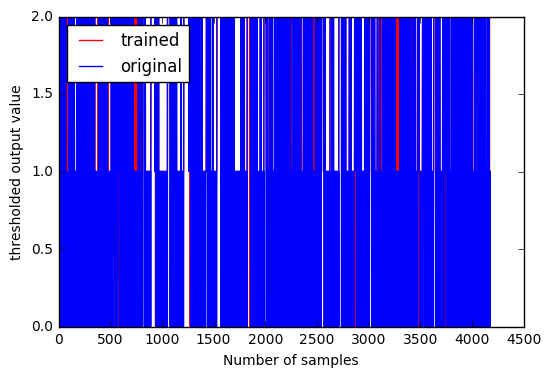

In [12]:
# Confusion matrix
lda = ql.LDA()
lda.train(X,T)
predictedClasses,_,_ = lda.use(X)
ml.confusionMatrix(T,predictedClasses,np.unique(T));
ml.plotResults(T,predictedClasses)


added error:  2235.70883173
average error:  0.642085551782
added error:  2231.02677419
average error:  0.641492352736
added error:  2229.10054724
average error:  0.641289610881
added error:  2225.90508846
average error:  0.639785565709
added error:  2222.52616193
average error:  0.636282260812
added error:  2223.69323613
average error:  0.637276388934
added error:  2228.47987791
average error:  0.640230630667
added error:  2229.01818711
average error:  0.641987621428
added error:  2224.31067089
average error:  0.639383537861
added error:  2222.53763859
average error:  0.639135615741
added error:  2217.90671819
average error:  0.638860952576
added error:  2216.29869883
average error:  0.637823790669
added error:  2231.65785078
average error:  0.643344889645
added error:  2228.56649276
average error:  0.6426459515
0.292987
0.192497
0.676039


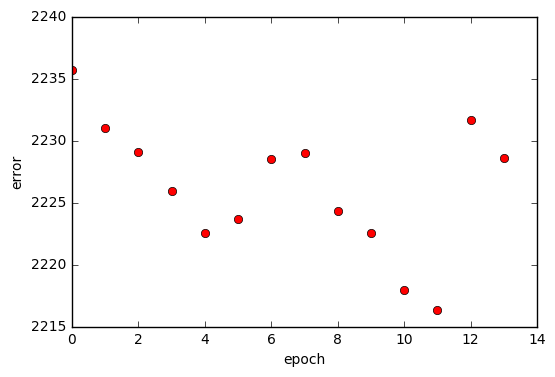

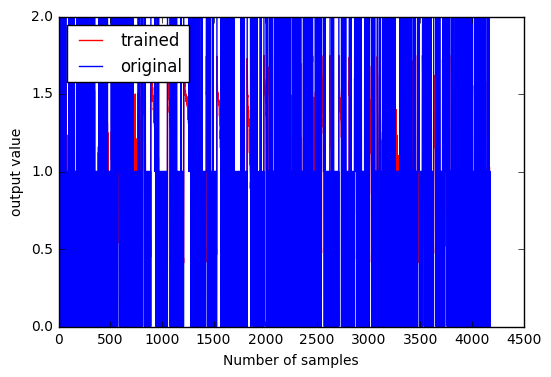

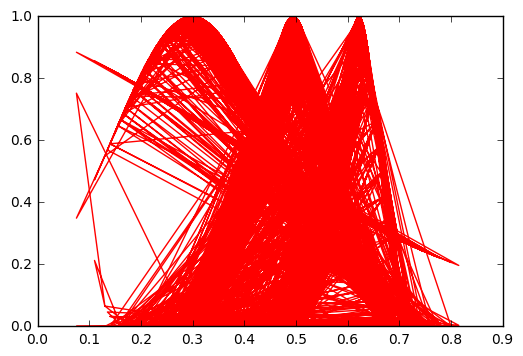

In [13]:
#ANFIS
X = data[:,1:3]
T = data[:,0].reshape( (X.shape[0], ))
mf = [[['gaussmf',{'mean':0.16,'sigma':0.08}],['gaussmf',{'mean':0.3,'sigma':0.05}],['gaussmf',{'mean':0.45,'sigma':0.05}],['gaussmf',{'mean':0.6,'sigma':0.1}],['gaussmf',{'mean':0.75,'sigma':0.05}],['gaussmf',{'mean':0.9,'sigma':0.08}]],
     [['gaussmf',{'mean':0.05,'sigma':0.05}],['gaussmf',{'mean':0.18,'sigma':0.05}],['gaussmf',{'mean':0.38,'sigma':0.1}],['gaussmf',{'mean':0.52,'sigma':0.05}],['gaussmf',{'mean':0.62,'sigma':0.05}]]]

mfc = mfunc.MemFuncs(mf)
anf = anfis.ANFIS(X, T, mfc)
anf.trainHybridJangOffLine(epochs=15)
print (round(anf.consequents[-1][0],6))
print (round(anf.consequents[-2][0],6))
print (round(anf.fittedValues[9][0],6))

anf.plotErrors()
anf.plotResults() 

anf.plotMF(X[:,0],len(mf)-1)  


       0    1    2
    ------------------
 0 | 59.4 29.0 11.6   (1528 / 1528)
 1 | 64.0 29.2  6.8   (1307 / 1307)
 2 |  9.7 37.5 52.8   (1342 / 1342)


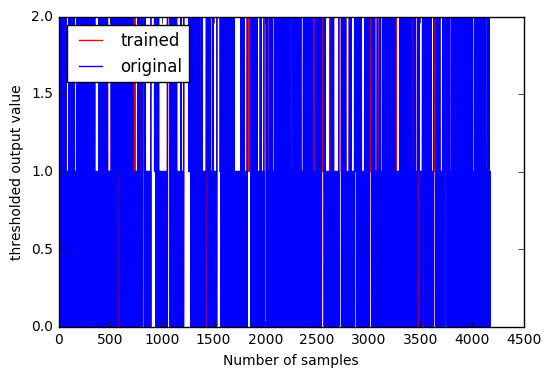

In [14]:
for i in range(len(anf.fittedValues)):
    if(anf.fittedValues[i]>0.0 and anf.fittedValues[i]<=0.7):
        anf.fittedValues[i] = 0
    if(anf.fittedValues[i]>0.7 and anf.fittedValues[i]<=1.3):
        anf.fittedValues[i] = 1
    if(anf.fittedValues[i]>1.3):
        anf.fittedValues[i] = 2
ml.confusionMatrix(T,anf.fittedValues,np.unique(T)) 
ml.plotResults(T,anf.fittedValues)

### OBSERVATION FOR DATA III

### Classification Table & Confusion Matrix

**LDA** - It's only two attributes and continuous values in this data set as compared to the categorical values in other two data sets. This data set was big but as python cannot handle all the inputs with the memory consuming anfis model, only two were taken. Here, training, test and validate accuracies were in 60s which is not desired. Thus, we see that the confusion matrix is not in a good shape as well.

**LLR** - In this case as well, we see most of the accuracies in 60s and some in 70s which is acceptable but not great, again we see iterations doesn't matter much. 

**NLR** - The performance was similar to LLR owing to just two attributes. We can see the accuracies going into 40s and 50s which is not good. It may be because the neural net didn't have enough neurons to train the whole model. The problem was limited and we know that small neural network don't work very well. 

**ANFIS** - Along with NLR, it also failed to show considerable accuracy that it showed in the previous data sets. But still the output is much better than the other three methods. We can also see in the plot that errors are not decreasing and that explains why the model is not accurate. 

## RESULTS

1. **Linear Discriminant Analysis** 
    1. LDA was the worst method of all but it still gave considerable accuracy. It's average was approxiamately 70%. 
    2. LDA performs better as the number of attributes increases, number of instances increase (there is no significant change but a minuscale increase in accuracy). 
    3. It worked better with categorical values (integers) rather than continuous values.
    4. It is not flexible as there are no parameters we can vary.
    5. It didn't use a lot of memory.
    6. Lowest time.

2. **Linear Logistic Regression**
    1. It's average accuracy was around 73%.
    2. It showed improvment with the increase in attributes but didn't show any significant change when instances were more.
    3. It worked better with categorical values (integers) rather than continuous values.
    4. We could change iterations but we observed in all the three data sets that increasing the iterations didn't improve the performance.
    5. In some cases, we achieved accuracy closer to 90% and was comparable to Non-Linear Logistic Regression. 
    6. In this case, memory errors were not obtained. 
    7. Comparitively less time.

3. **Non-Linear Logistic Regression**
    1. It's average accuracy was 86% which only dropped due to third data set because of less attributes.
    2. It works well if we have more than 4 attributes otherwise it fails miserably. Increasing the number of instances didn't show any significant improvement.
    3. It worked better with categorical values (integers) rather than continuous values.
    4. It is flexible as we can change iterations and hidden layers.
    5. Increasing the number of iterations is directly proportional to the performance. So is the number of hidden layers. But if we keep on increasing the iterations and hidden layers, the performance will just be stable and won't improve.
    6. Accuracy of 100% was also achieved in this case.
    7. Memory errors are not common.
    8. Takes time but relatively very less as compared to ANFIS.

4. **Adaptive Neuro Fuzzy Inference System**
    1. It's average accuracy on the test set was 92%. 
    2. It's performance increases as the number of attributes increases. More the membership functions better is the output. But it also increases the probality of the memory error. So it is a trade off between two.
    3. No change observed with increase in number of instances.
    4. It is flexible. We can change the number of epochs. Membership functions can be designed manually. Learning rate can be changed. 
    5. We cannot change the number of hidden layers.
    6. Exceptional accuracy was obtained in this case. It performed well as compared to other three methods.
    7. Memory error was obtained. Hence, couldn't involve all the attributes.
    8. We need not be careful while designing the membership functions as it trains the value on its own irrespective of the function. If the column values fit in the membership function, we are good.
    9. Sometimes the model seem to overfit if the instances are higher.
    10. Computation is very high as compared to other methods.

#### Advantages over traditional Fuzzy logic

1. Membership function design need not be accurate. Thus, we can include data set with higher number of instances as well.
2. Feedback loop increases the accuracy of the model.
3. Easy model.
4. It can work with n dimensions where we just have to initialize the range of the dimension.
5. It works well with small number of instances.

#### General Disadvantages of ANFIS

1. Computation time is high.
2. Memory error is common with either many attributes or large number of instances.
3. Model overfits.

#### FUTURE SCOPE

1. Manual thresholding was used for classification but we can use classification method in citation [3] to improve the performance further.
2. Develop an anfis algorithm which consumes less memory.
3. Optimize the algorithm to compute in less time.
4. Image classification can be achieved with different attributes of images as inputs.

## CONCLUSION

We have observed that ANFIS works better than the other state-of-the-art methods and thus is potentially the best method for classification. With some optimization in computation time, memory consumption and classification thresholding, we can get the best out of ANFIS. 

## CITATIONS

[1]. http://www.ijcaonline.org/research/volume123/number13/walia-2015-ijca-905635.pdf

[2]. https://en.wikipedia.org/wiki/Fuzzy_logic

[3]. http://www.sciencedirect.com/science/article/pii/S0165027005001172

[4]. https://www.hindawi.com/journals/afs/2013/581879/

[5]. https://in.mathworks.com/help/fuzzy/anfis.html

[6].http://neuron.csie.ntust.edu.tw/homework/93/Fuzzy/%E5%9C%A8%E8%81%B7%E7%A0%94%E7%A9%B6%E6%89%80/homework_2/M9315916/welcome.files/page0006.html